# Effective rank

According to Roy & Vetterli 2007, effective rank of a matrix is defined by

$$\mathrm{erank}(M) = \exp H(\vec{e})$$

Where $H(x) = -\sum_i p_i \log p_i$ is the discrete Shannon entropy, and $\vec{e} = \frac{\mathrm{eval}(M)}{\mathrm{eval}(M)_0}$ is the normalized eigenspectrum of the matrix.

Among cool properties
* $\mathrm{erank}(M) \leq \mathrm{rk}(M)$
* $1 \leq \mathrm{erank}(M) \leq N$

Of course, we are interested in the effective rank of the correlation matrix

$$M_{ij} = \mathrm{corr}_{ij}(\vec{x}) = \frac{\mathrm{cov}_{ij}(\vec{x})}{\sigma_i \sigma_j}$$

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def H1D(p1d):
    return -np.sum([p * np.log(p) for p in p1d])

def erank(data2D):
    '''
    params: data2D - input data of shape (channels, samples)
    returns: a scalar - effective rank
    '''
    
    corr = np.corrcoef(data2D)
    eig = np.linalg.eigvals(corr)
    eigNorm = eig / np.sum(eig)
    
    return np.exp(H1D(eigNorm))

def avgcorr(data2D):
    corr = np.corrcoef(data2D)
    corr1D = corr[~np.eye(len(corr)).astype(bool)]
    return np.linalg.norm(corr1D) / np.sqrt(len(corr))

# Check how metric behaves for random data

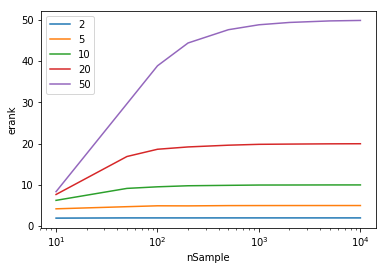

In [24]:
nChLst = [2,5,10,20,50]
nSampleLst = [10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

plt.figure()

for nChannel in nChLst:
    rezLst = []
    for nSample in nSampleLst:
        data2D = np.random.normal(0,1, (nChannel, nSample))
        rezLst += [erank(data2D)]
        
    plt.semilogx(nSampleLst, rezLst, label=str(nChannel))
    
plt.xlabel('nSample')
plt.ylabel('erank')
plt.legend()
plt.show()

# Relationship to average correlation

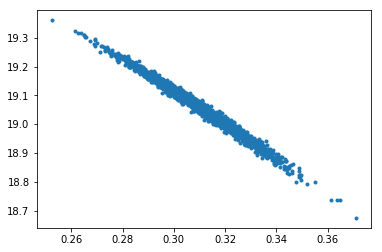

In [32]:
erankLst = []
avgCorrLst = []

for iTest in range(2000):
    data2D = np.random.normal(0,1, (20, 200))
    erankLst += [erank(data2D)]
    avgCorrLst += [avgcorr(data2D)]
    
plt.figure()
plt.plot(avgCorrLst, erankLst, '.')
plt.show()